# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [7]:
from pyexpat import model
from sys import prefix

from PIL import Image
import numpy as np
import os

def load_images():
    images = list()
    for image_filename in os.listdir("images"):
        path = os.path.join("images", image_filename)
        img = Image.open(path)
        img = np.asarray(img, dtype="float32") / 255.0
        images.append(img.flatten())

    return np.array(images)

images = load_images()
print(images.shape)


(8, 12288)


### 2. Compute the mean of the images. 

In [8]:
np.mean(images, axis=0)

array([0.27254903, 0.34509805, 0.22745098, ..., 0.3769608 , 0.40735295,
       0.33676472], shape=(12288,), dtype=float32)

### 3. Normalize the images by subtracting the mean from each image.

In [10]:
normalized_images = images - np.mean(images, axis=0)
np.mean(normalized_images, axis=0)

array([-7.4505806e-09,  0.0000000e+00,  9.3132257e-09, ...,
       -2.2351742e-08,  0.0000000e+00, -7.4505806e-09],
      shape=(12288,), dtype=float32)

### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [31]:
coefs = np.load('coefs.npy')
bias = np.load('bias.npy')

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def make_prediction_probs(input):
    return softmax(input @ coefs + bias)

def make_predictions(input):
    probs = make_prediction_probs(input)
    return probs.argmax()

preds = np.array([make_predictions(image) for image in normalized_images])
preds

array([2, 0, 0, 3, 1, 2, 2, 1])

r### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score).
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [32]:
def accuracy(preds, labels):
    return np.sum(preds == labels) / len(preds)

labels = [0, 0, 1, 1, 2, 2, 3, 3]
accuracy(preds, labels)

np.float64(0.25)

### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [35]:
prediction_class = {
    0: 'cat',
    1: 'dog',
    2: 'frog',
    3: 'horse'
}

classes = [prediction_class[pred] for pred in preds]
classes

['frog', 'cat', 'cat', 'horse', 'dog', 'frog', 'frog', 'dog']

### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

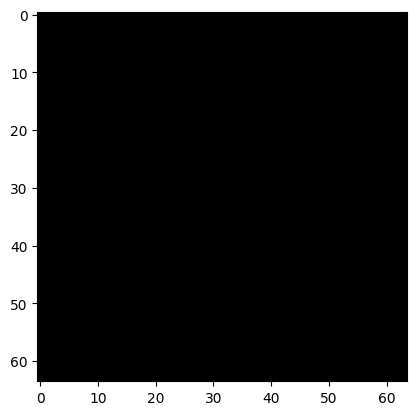

In [41]:
import matplotlib.pyplot as plt

image = normalized_images.mean(axis=0)
image = np.array(image, dtype='uint8')
image = np.reshape(image, (64, 64, 3))
plt.imshow(image)